In [2]:
#script to look at some simple summary statistics of data
import matplotlib.pyplot as plt
import matplotlib.dates
import numpy as np
import pandas as pd
import tensorflow as tf
import datetime
import nycsales as nyc
from scipy import stats
from sklearn.model_selection import train_test_split


In [3]:
#take a quick look at the dataframe to see data
fname = 'data/2016'+'_brooklyn.csv'
bk = pd.read_csv(fname,sep = ',')
bk.sample(n=10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
2569,3.0,BEDFORD STUYVESANT,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,1773.0,1105.0,,R1,223 PULASKI STREET,3A,...,1.0,0.0,1.0,0.0,0.0,2015.0,2.0,R1,414726.0,2016-08-18
15775,3.0,GRAVESEND,05 TAX CLASS 1 VACANT LAND,1B,6880.0,38.0,,V0,N/A BAY 40TH STREET,,...,0.0,0.0,0.0,2932.0,0.0,0.0,1.0,V0,0.0,2016-09-07
6911,3.0,BUSHWICK,03 THREE FAMILY DWELLINGS,1.0,3438.0,37.0,,C0,1398 BUSHWICK AVENUE,,...,3.0,0.0,3.0,1560.0,3900.0,1901.0,1.0,C0,830000.0,2016-09-29
15534,3.0,GRAVESEND,02 TWO FAMILY DWELLINGS,1.0,6915.0,80.0,,B9,157 BAY 47TH STREET,,...,2.0,0.0,2.0,2417.0,2656.0,1965.0,1.0,B9,1170000.0,2016-08-30
20740,3.0,PARK SLOPE,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,1060.0,1004.0,,R1,25 8 AVENUE,1,...,1.0,0.0,1.0,0.0,0.0,0.0,2.0,R1,4500000.0,2016-09-23
10985,3.0,DOWNTOWN-METROTECH,13 CONDOS - ELEVATOR APARTMENTS,2.0,2049.0,1045.0,,R4,176 JOHNSON STREET,7C,...,1.0,0.0,1.0,0.0,0.0,1926.0,2.0,R4,0.0,2016-08-05
18314,3.0,NAVY YARD,01 ONE FAMILY DWELLINGS,1.0,2033.0,29.0,,A5,35 CLERMONT AVENUE,,...,1.0,0.0,1.0,1300.0,3105.0,2014.0,1.0,A5,2036500.0,2016-07-29
11238,3.0,DYKER HEIGHTS,02 TWO FAMILY DWELLINGS,1.0,6233.0,69.0,,B3,1323 77TH STREET,,...,2.0,0.0,2.0,2000.0,2360.0,1920.0,1.0,B3,0.0,2016-05-24
12511,3.0,FLATBUSH-CENTRAL,01 ONE FAMILY DWELLINGS,1.0,5091.0,68.0,,S1,2807 CHURCH AVENUE,,...,1.0,1.0,2.0,2538.0,2684.0,1931.0,1.0,S1,772687.0,2016-06-28
5068,3.0,BOROUGH PARK,44 CONDO PARKING,4.0,5590.0,1158.0,,RG,970 41ST STREET,P4,...,0.0,0.0,1.0,0.0,0.0,0.0,4.0,RG,0.0,2016-05-23


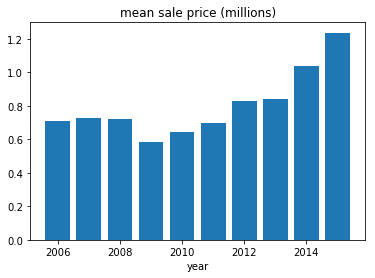

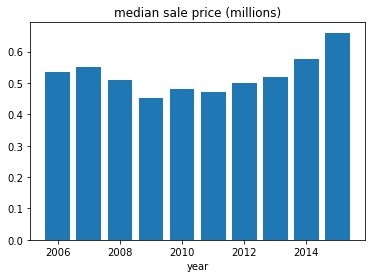

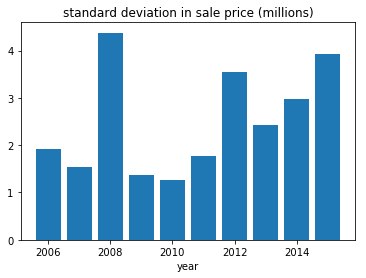

In [4]:
#calculate mean and variance for each year, by neighborhood
years = ['06','07','08','09','10','11','12','13','14','15']
yearlabel = ['20'+i for i in years]
nyears = len(years)
sales_mean = np.zeros((nyears,))
sales_median = np.zeros((nyears,))
sales_std = np.zeros((nyears,))
for i in range(nyears):
    #print(i)
    fname = 'data/20'+years[i]+'_brooklyn.csv'
    bk = pd.read_csv(fname,sep = ',')
    sales_bk = bk.loc[bk['SALE PRICE']> 0,'SALE PRICE']
    sales_mean[i] = np.mean(sales_bk)
    sales_median[i] = np.median(sales_bk)
    sales_std[i]  = np.std(sales_bk)
    

#plot basic stats
plt.bar(list(map(int,yearlabel)),sales_mean/1.0e6)
plt.xlabel('year')
plt.title('mean sale price (millions)')
plt.show()

plt.bar(list(map(int,yearlabel)),sales_median/1.0e6)
plt.xlabel('year')
plt.title('median sale price (millions)')
plt.show()

plt.bar(list(map(int,yearlabel)),sales_std/1.0e6)
plt.xlabel('year')
plt.title('standard deviation in sale price (millions)')
plt.show()

#plt.boxplot(x=sales_bk/1.0e6,showfliers=False,showmeans=True)


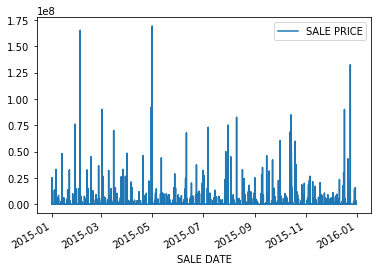

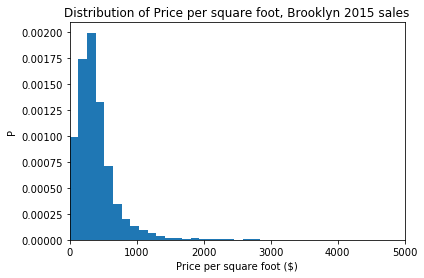

In [49]:
#timecourse of sales in 2015
fname = 'data/2015'+'_brooklyn.csv'
bk = pd.read_csv(fname,sep = ',')

#sort by date and plot
bk['SALE DATE'] =pd.to_datetime(bk['SALE DATE'])
bk.sort_values('SALE DATE')
bk.plot('SALE DATE','SALE PRICE')
plt.show()

#histogram of plot price per sq. ft
test1 = bk['SALE PRICE'] > 0.0 
test2 = bk['GROSS SQUARE FEET'] > 0.0
test3 = ~np.isnan(bk['SALE PRICE'])
test4 = ~np.isnan(bk['GROSS SQUARE FEET'])
test = test1 & test2 & test3 & test4

vals_clean = bk.loc[test,['SALE PRICE','GROSS SQUARE FEET']]
ppsf = vals_clean['SALE PRICE']/vals_clean['GROSS SQUARE FEET']
plt.hist(ppsf,bins=300,normed = True)
plt.xlabel('Price per square foot ($)')
plt.ylabel('P')
plt.xlim([0,5000])
plt.title('Distribution of Price per square foot, Brooklyn 2015 sales')
plt.show()



In [5]:
#find cheapest and most expensive sale from each year. just for fun
#calculate mean and variance for each year, by neighborhood
years = ['06','07','08','09','10','11','12','13','14','15','16']
yearlabel = ['20'+i for i in years]
nyears = len(years)
df_max = pd.DataFrame()
df_min = pd.DataFrame()
for i in range(nyears):
    fname = 'data/20'+years[i]+'_brooklyn.csv'
    bk = pd.read_csv(fname,sep = ',')

    entry_max = bk.loc[bk['SALE PRICE'].idxmax()]
    min_filtered = bk.loc[bk['SALE PRICE']> 0,:]
    entry_min = bk.loc[min_filtered['SALE PRICE'].idxmin()]
    df_max = df_max.append(entry_max)
    df_min = df_min.append(entry_min)
    


In [6]:
df_max

,ADDRESS,APARTMENT NUMBER,BLOCK,BOROUGH,BUILDING CLASS AT PRESENT,BUILDING CLASS AT TIME OF SALE,BUILDING CLASS CATEGORY,COMMERCIAL UNITS,EASE-MENT,GROSS SQUARE FEET,...,LOT,NEIGHBORHOOD,RESIDENTIAL UNITS,SALE DATE,SALE PRICE,TAX CLASS AT PRESENT,TAX CLASS AT TIME OF SALE,TOTAL UNITS,YEAR BUILT,ZIP CODE
6715,182 MONTAGUE STREET,,250.0,3.0,D6,D6,08 RENTALS - ELEVATOR APARTMENTS,1.0,,182000.0,...,30.0,BROOKLYN HEIGHTS,186.0,2006-04-07,101000000.0,2.0,2.0,187.0,1999.0,11201.0
6871,16 COURT STREET,,250.0,3.0,O3,O3,21 OFFICE BUILDINGS,3.0,,290440.0,...,44.0,BROOKLYN HEIGHTS,0.0,2007-07-18,107500000.0,4.0,4.0,3.0,1928.0,11201.0
9964,330 JAY STREET,COURT,140.0,3.0,R5,R5,28 COMMERCIAL CONDOS,1.0,,0.0,...,1001.0,DOWNTOWN-METROTECH,0.0,2008-04-23,499401179.0,4.0,4.0,1.0,2002.0,11201.0
7103,1001 BOARDWALK WEST,,8696.0,3.0,P6,P6,35 INDOOR PUBLIC AND CULTURAL FACILITIES,3.0,,30000.0,...,212.0,CONEY ISLAND,0.0,2009-12-16,95600000.0,4.0,4.0,3.0,1965.0,11235.0
12311,110 GREEN STREET,,2522.0,3.0,D1,D1,08 RENTALS - ELEVATOR APARTMENTS,0.0,,173476.0,...,16.0,GREENPOINT,130.0,2010-12-13,58200000.0,2.0,2.0,130.0,2007.0,11222.0
19231,173 KENT AVENUE,,2349.0,3.0,D6,D6,08 RENTALS - ELEVATOR APARTMENTS,1.0,,166100.0,...,1.0,WILLIAMSBURG-NORTH,112.0,2011-12-20,76000000.0,2.0,2.0,113.0,2009.0,11211.0
16600,5120 AVENUE U,,8470.0,3.0,K6,K6,22 STORE BUILDINGS,123.0,,2548000.0,...,55.0,MILL BASIN,0.0,2012-11-28,276947000.0,4.0,4.0,123.0,1970.0,11234.0
10820,486 FULTON STREET,LOWER,159.0,3.0,RK,R5,28 COMMERCIAL CONDOS,0.0,,0.0,...,1001.0,DOWNTOWN-FULTON MALL,0.0,2013-12-02,135212000.0,4.0,4.0,1.0,1920.0,11201.0
16936,155 WEST STREET,,2530.0,3.0,E1,E1,30 WAREHOUSES,2.0,,95000.0,...,1.0,GREENPOINT,0.0,2014-08-08,120000000.0,4.0,4.0,2.0,1971.0,11222.0
24141,250 N 10 STREET,,2307.0,3.0,D8,D8,08 RENTALS - ELEVATOR APARTMENTS,3.0,,241764.0,...,1.0,WILLIAMSBURG-NORTH,234.0,2015-05-01,169000000.0,2.0,2.0,237.0,2012.0,11211.0
